In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
pickleFile = './CutflowforMonojet_DM_spin-1mediator_DF.pcl'
df = pd.read_pickle(pickleFile)

In [3]:
print(df.columns)

Index(['Coupling', 'Mode', '$m_{med}$', '$m_{DM}$', '$g_{\chi}$', '$g_{q}$',
       'Data-takingperiod', 'Fullsample', 'Triggeremulation',
       '$p_{T}^{miss}>250$GeV', '$p_{T}^{miss}$qualityfilters', 'Electronveto',
       'Muonveto', 'Tauveto', 'Bjetveto', 'Photonveto',
       '"$\Delta\phi(jet_p_{T}^{miss})>0.5$rad"',
       '$\Deltap_{T}^{miss}$(PF-Calorimeter)$<0.5$rad',
       'LeadingAK4jet$p_{T}>100$GeV', 'LeadingAK4jet$\eta<2.4$',
       'LeadingAK4jetenergyfractions', 'Mono-Voverlapremoval',
       'HCALmitigation(jets)', 'HCALmitigation($\phi^{miss}$)',
       '"$\Delta\phi(\mathrm{PF}_\mathrm{Charged})<2.0$rad"'],
      dtype='object')


In [4]:
dfAxialMonoJ = df[(df['Coupling'] == 'Axial') & (df['Mode'] == '$\\chi\\chi+j$')]
dfVectorMonoJ = df[(df['Coupling'] == 'Vector') & (df['Mode'] == '$\\chi\\chi+j$')]

In [5]:
dfAxialMonoJ

,Coupling,Mode,$m_{med}$,$m_{DM}$,$g_{\chi}$,$g_{q}$,Data-takingperiod,Fullsample,Triggeremulation,$p_{T}^{miss}>250$GeV,...,Photonveto,"""$\Delta\phi(jet_p_{T}^{miss})>0.5$rad""",$\Deltap_{T}^{miss}$(PF-Calorimeter)$<0.5$rad,LeadingAK4jet$p_{T}>100$GeV,LeadingAK4jet$\eta<2.4$,LeadingAK4jetenergyfractions,Mono-Voverlapremoval,HCALmitigation(jets),HCALmitigation($\phi^{miss}$),"""$\Delta\phi(\mathrm{PF}_\mathrm{Charged})<2.0$rad"""
59,Axial,$\chi\chi+j$,100.0,1.0,1.0,0.25,2017,1.0,0.84529,0.18131,...,0.17438,0.15878,0.15759,0.14626,0.14626,0.14489,0.13961,0.13961,0.13961,0.13955
292,Axial,$\chi\chi+j$,100.0,1.0,1.0,0.25,2018,1.0,0.81867,0.17612,...,0.16982,0.15464,0.15416,0.14500,0.14500,0.14370,0.13812,0.13214,0.11154,0.11151
44,Axial,$\chi\chi+j$,100.0,30.0,1.0,0.25,2017,1.0,0.84545,0.18221,...,0.17523,0.15935,0.15809,0.14668,0.14668,0.14538,0.13995,0.13995,0.13995,0.13988
266,Axial,$\chi\chi+j$,100.0,30.0,1.0,0.25,2018,1.0,0.81959,0.17460,...,0.16817,0.15381,0.15334,0.14426,0.14426,0.14303,0.13734,0.13127,0.11018,0.11015
15,Axial,$\chi\chi+j$,100.0,40.0,1.0,0.25,2017,1.0,0.84635,0.18303,...,0.17625,0.16045,0.15929,0.14771,0.14771,0.14630,0.14080,0.14080,0.14080,0.14075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Axial,$\chi\chi+j$,2500.0,750.0,1.0,0.25,2018,1.0,0.88199,0.47193,...,0.45490,0.42419,0.42339,0.41353,0.41353,0.41171,0.39549,0.37875,0.33279,0.33276
11,Axial,$\chi\chi+j$,2500.0,1000.0,1.0,0.25,2017,1.0,0.90069,0.47335,...,0.45611,0.42539,0.42361,0.41248,0.41248,0.41072,0.39491,0.39491,0.39491,0.39487
308,Axial,$\chi\chi+j$,2500.0,1000.0,1.0,0.25,2018,1.0,0.88296,0.47240,...,0.45518,0.42490,0.42400,0.41409,0.41409,0.41239,0.39589,0.37904,0.33360,0.33358
36,Axial,$\chi\chi+j$,2500.0,1500.0,1.0,0.25,2017,1.0,0.90311,0.49001,...,0.47223,0.44067,0.43893,0.42603,0.42603,0.42441,0.40860,0.40860,0.40860,0.40856


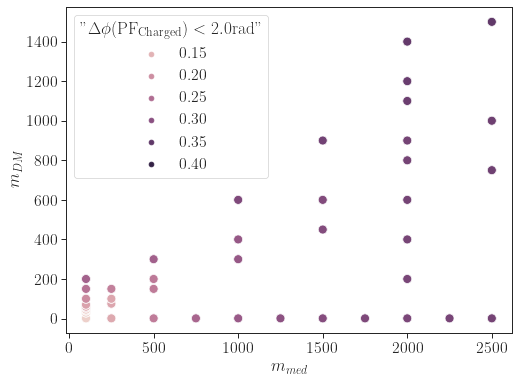

In [6]:
plt.figure(figsize=(8,6))
p =sns.scatterplot(data=dfAxialMonoJ,x='$m_{med}$', y='$m_{DM}$',
                hue='"$\Delta\phi(\mathrm{PF}_\mathrm{Charged})<2.0$rad"',s=80)


In [7]:
dfAxialMonoJ[(dfAxialMonoJ['$m_{med}$'] == 2000.) 
             & (dfAxialMonoJ['$m_{DM}$'] == 1.) 
             & (dfAxialMonoJ['Data-takingperiod'] == 2017)].T

,85
Coupling,Axial
Mode,$\chi\chi+j$
$m_{med}$,2000.0
$m_{DM}$,1.0
$g_{\chi}$,1.0
$g_{q}$,0.25
Data-takingperiod,2017
Fullsample,1.0
Triggeremulation,0.89878
$p_{T}^{miss}>250$GeV,0.45603
